# Importance Sampling 


The expectation value of a function $H({\bf x})$ is defined as

$$
\begin{align}
 \langle H({\bf x})\rangle_{f} = \int d{\bf x} H({\bf x}) f({\bf x; u}),
\end{align}
$$

where $f({\bf x})$ is the probability distribution. The unbiased estimator of this expectation value is

$$
\begin{align}
\langle H({\bf x})\rangle_{f} \approx \frac{1}{N}\sum_{i=1} H({\bf X_i}),
\end{align}
$$
where the sample points $X_i$ are drawn from the distribution $f$. This method may be a computationally inneficient estimate of the expectation value of $H$. We would like to modify our previous estimator to the form 
$$
\begin{align}
\langle H({\bf x})\rangle_{g} \approx \frac{1}{N}\sum_{i=1} w(X_i)H({\bf X_i}),
\end{align}
$$
where $w(X_i)$ is an unknown weight factor and $X_i$ are drawn from a new probability distribution $g({\bf x})$ that samples $H(x)$ more effectively. 


We would like to relate how the weight functions $w(x)$ relate to the new distribution $g(x)$. This relation is very simple
$$
\begin{align}
 \langle H({\bf x})\rangle_{f} &= \int d{\bf x} H({\bf x}) f({\bf x; u}),\\
  &= \int d{\bf x} H({\bf x}) \frac{f({\bf x; u})}{g({\bf x})} g({\bf x}) \\
  &=  \int d{\bf x} H({\bf x}) w({\bf x; u}) g({\bf x}) \\
  &\equiv \langle H({\bf x})\rangle_{g}.
\end{align}
$$


Now we would like to choose the best distribution function $g^*({\bf x})$ to sample $H({\bf x})$. This can be done by choosing the $g({\bf x})$ function that minimizes the variance of the estimate $\langle H({\bf x})\rangle_g$ 

The variance of this estimate is given by the integral
$$
\begin{align}
\sigma^2 = \int d{\bf x} \left( w({\bf x})H({\bf x})-\mu \right)^2 g({\bf x}),
\end{align}
$$
where $\mu$ is the expectation value of the function $H({\bf x})$. Minimizing the variance of this expression with respect to $w({\bf x})$, we get

$$
\begin{align}
\frac{d\sigma^2}{dw} = 0 &= \int d{\bf x} \left( w({\bf x})H({\bf x})-\mu \right)H(x)\delta({\bf x-y})  g({\bf x}) \\
&\Rightarrow \\
w({\bf y}) &= \frac{\mu}{H({\bf y})}
\end{align}
$$

Re-writing $w({\bf y})$ in terms of $f$ and $g$ gives,

$$
\begin{align}
g^*({\bf y}) = \frac{H({\bf y})f({\bf y; u})}{\mu}.
\end{align}
$$

This last expression for $g^*$ represents the optimal choice of the importance sampling function $g$. If we want to find the best function $g({\bf y})$ to carry out importance sampling, we must choose $g=g^*$ given above.


# Cross Entropy Estimation


Let us return to the problem of estimating the expectation value
$$
\begin{align}
\langle H({\bf x})\rangle_{f} = \int d{\bf x} H({\bf x}) f({\bf x; u}).
\end{align}
$$
The best importance sampling function to estimate this integral is
$$
\begin{align}
g^*({\bf x}) = \frac{H({\bf x})f({\bf x;u})}{\mu}.
\end{align}
$$

Instead of using this function directly with the unknown parameter $\mu$, we approximate the function $g^*(x)$ using our parametrized function $f({\bf x;v})$. This approximation can be carried out using the Kullback-Leibler divergence

$$
\begin{align}
D(g^*,f({\bf x;v})) = \int dx \ g^*({\bf x}) {\rm ln}(g^*({\bf x})) - \int dx \ g^*({\bf x}) {\rm ln}(f({\bf x;v})).
\end{align}
$$

The above expression vanishes when the two functions $g^*$ and $f$ are equal. To minimize the above expression in terms of the parameter ${\bf v}$, we must maximize the expression
$$
\begin{align}
D({\bf v}) &= \int dx \ g^*({\bf x}) {\rm ln}(f({\bf x; v})),\\
 &= \frac{1}{\mu}\int dx \ H({\bf x}) f({\bf x; u}) {\rm ln}(f({\bf x; v})),\\
  &= \frac{1}{\mu}\int dx \ H({\bf x}) \frac{f({\bf x; u})}{f({\bf x,w})} {\rm ln}(f({\bf x; v})) f({\bf x,w}),\\
  &= \frac{1}{\mu}\int dx \ H({\bf x}) w({\bf x;u,w}) {\rm ln}(f({\bf x; v})) f({\bf x,w}).
\end{align}
$$
Therefore, The optimal choice of ${\bf v}$ is given by solving the expression
$$
\begin{align}
\nabla_{\bf v}D({\bf v}) &= 0 \\
\int dx \ H({\bf x}) w({\bf x;u,w}) {\bf \nabla}_{\bf v}{\rm ln}(f({\bf x; v})) f({\bf x,w})&=0.
\end{align}
$$
When sampling this integral, this last expression will be

$$
\begin{align}
\frac{1}{N}\sum_i H({\bf X_i})w({\bf X_i;u,w})  \nabla_{\bf v}{\rm ln}(f({\bf X_i;v})) = 0
\end{align}
$$
where 
$$
X_i \sim  f({\bf x,w}).
$$


## Using Cross Entropy for Optimization

To optimize the function $H({\bf x})$ using cross entropy optimization we will consider the integral that represents that the function $H({\bf x})$ is greater or equal to the maximum of the function $H({\bf x^*})=\gamma^*$.

$$
P(H >= \gamma^*) = \int d{\bf x} \ I_{ \lbrace H({\bf x})  >= \gamma^* \rbrace }(x) f({\bf x; u})
$$

Note that we dont know ahead of time what $x^*$ and $\gamma^*$ are yet. These will be updated iteratively.



Using the ideas of importance sampling and minimizing the KL-divergence from the previous section, 
$$
\begin{align}
\frac{1}{N}\sum_i H({\bf X_i})\nabla_{\bf v}{\rm ln}(f({\bf X_i;v})) = 0
\end{align}
$$
where $X_i \sim  f({\bf x,u})$. The algorithm to do this iteratively is below


#### Algorithm

* Choose $\rho$  
* Choose $N$ 
* Initilize ${\bf u}$



1. Sample $N$ points,  $X_i \sim f({\bf x,u})$, compute $H(X_i)$
2. Order $(X_i,H(X_i))$ in decending order according to the values $H(X_i)$  
3. Using the $N_\rho = N\rho$ elite samples determine the solution ${\bf v}$ to 


$$
\frac{1}{N_\rho}\sum\limits_{i=1}^{N_\rho} H({\bf X_i})\nabla_{\bf v}{\rm ln}(f({\bf X_i;v})) = 0
$$

let this new solution replace the previous result, ${\bf v} \rightarrow {\bf u}$

4. Go to step 1, repeat until convergence criteria is met


#### References 

[ [1] ](http://web.mit.edu/6.454/www/www_fall_2003/gew/CEtutorial.pdf) **A Tutorial on the Cross-Entropy Method** Pieter-Tjerk de Boer   

[[2]](https://link.springer.com/article/10.1007/s11009-006-9753-0)  D. P. Kroese, S. Porotsky and R. Y. Rubinstein, **The Cross-Entropy Method for Continuous
Multi-Extremal Optimization**, Methodol. Comput. Appl. Probab. 8 (2006).

[[3]](https://www.sciencedirect.com/science/article/pii/S0968090X1100088X?via%3Dihub) M. Maher, R. Liu, D. Ngoduy, **Signal optimization using the cross entropy method**, Transportation Research C. 27, (2013).  


[[4]](https://www.sciencedirect.com/science/article/pii/B9780444538598000035) Zdravko I. Botev, Dirk P. Kroese, Reuven Y. Rubinstein, Pierre L’Ecuyer, **Chapter 3 - The Cross-Entropy Method for Optimization**, Handbook of Statistics, Elsevier, 31, 35-59, (2013).

# Let us now implement the above algorithm as a simple example

In [1]:
# Simple Implementation

import numpy as np
import matplotlib.pyplot as plt

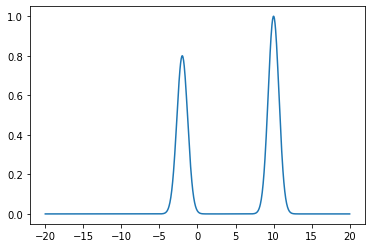

In [2]:
def H(x):
    '''
    This function has a global maximum at x=10
    and local maximum at x=-2
    '''
    return np.exp(-(x-10)**2)+0.8*np.exp(-(x+2)**2)

x = np.linspace(-20,20,num=1000)

plt.plot(x,H(x))
plt.show()

In [3]:

N = 1000
rho = 0.1
mu, sigma = -20.0,1000.0
N_rho = int(N*rho)

steps =200


for k in range(0,steps):
    x_samples = np.random.normal(loc=mu,scale=sigma,size=N)
    H_samples = H(x_samples) 
    data = np.array((x_samples,H_samples)).T

    # Now sort these tuples according to H(x_i) values
    sorted_data = np.array(sorted(data,key= lambda x: x[1],reverse=True))
    x_elite_samples = sorted_data[0:N_rho,0]
    
    # Update the Gaussian distribution parameters with the elite samples
    mu = np.mean(x_elite_samples)
    sigma = np.std(x_elite_samples)
    


print('Result from cross-entropy optimization: {0:0=.2f}'.format(mu))
print('Global maximum: {}'.format(10.0))

Result from cross-entropy optimization: 10.00
Global maximum: 10.0
